### Spatial Joins 

Spatial joins are used to combine two geospatial datasets based on their spatial relationship — for example, determining which points fall within which polygons.

In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
# Load the shapefile
world = gpd.read_file("world_countries/ne_10m_admin_0_countries.shp")

# Show the first few rows
print(world.head())

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

In [6]:
world = world.rename(columns={'ADMIN': 'Country'})

In [7]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,Country,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


Link to GPD Data: https://www.kaggle.com/datasets/ivanbyone/population-and-gdp-africa

In [8]:
#Load GDP Data
africa_gdp = pd.read_csv('Data_Africa.csv')
africa_gdp.head()

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [9]:
africa_gdp.isnull().sum()

ID               0
Year             0
Country          0
Continent        0
Population       0
GDP (USD)      155
dtype: int64

In [10]:
africa_gdp = africa_gdp.dropna(subset=['GDP (USD)'])

In [11]:
africa_gdp['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [12]:
# Filter data for the year 2022
gdp_2022 = africa_gdp[africa_gdp['Year'] == 2022]
gdp_2022.head()

,ID,Year,Country,Continent,Population,GDP (USD)
22,23,2022,Uganda,East Africa,47992685,4.555920e+10
45,46,2022,Burundi,East Africa,12504404,3.073415e+09
68,69,2022,Djibouti,East Africa,1007062,3.515109e+09
91,92,2022,Zambia,East Africa,19244849,2.978445e+10
114,115,2022,Zimbabwe,East Africa,15412353,2.067806e+10


In [13]:
gdp_2022['Country'].unique()

array(['Uganda', 'Burundi', 'Djibouti', 'Zambia', 'Zimbabwe', 'Kenya',
       'Union of the Comors', 'Mauritius', 'Madagascar', 'Malawi',
       'Mozambique', 'Rwanda', 'Seyshelles', 'Somalia', 'Tanzania',
       'Ethiopia', 'Sudan', 'Algeria', 'Egypt', 'Libya', 'Morocco',
       'Tunisia', 'Botswana', 'Lesotho', 'Namibia', 'Eswatini',
       'South Africa', 'Angola', 'Gabon', 'Cameroon',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Sao Tome and Principe', 'Central African Republic', 'Chad',
       'Equatorial Guinea', 'Benin', 'Burkina Faso', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Cape Verde', 'Liberia', 'Mauritania',
       'Mali', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'],
      dtype=object)

In [14]:
world['Country'].unique()

array(['Indonesia', 'Malaysia', 'Chile', 'Bolivia', 'Peru', 'Argentina',
       'Dhekelia Sovereign Base Area', 'Cyprus', 'India', 'China',
       'Israel', 'Palestine', 'Lebanon', 'Ethiopia', 'South Sudan',
       'Somalia', 'Kenya', 'Malawi', 'United Republic of Tanzania',
       'Syria', 'Somaliland', 'France', 'Suriname', 'Guyana',
       'South Korea', 'North Korea', 'Morocco', 'Western Sahara',
       'Costa Rica', 'Nicaragua', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'Bhutan', 'Ukraine', 'Belarus',
       'Namibia', 'South Africa', 'Saint Martin', 'Sint Maarten', 'Oman',
       'Uzbekistan', 'Kazakhstan', 'Tajikistan', 'Lithuania', 'Brazil',
       'Uruguay', 'Mongolia', 'Russia', 'Czechia', 'Germany', 'Estonia',
       'Latvia', 'Norway', 'Sweden', 'Finland', 'Vietnam', 'Cambodia',
       'Luxembourg', 'United Arab Emirates', 'Belgium', 'Georgia',
       'North Macedonia', 'Albania', 'Azerbaijan', 'Kosovo', 'Turkey',
       'Spain', 'Laos', 'Kyrgyzsta

In [15]:
african_countries = [
    'Uganda', 'Burundi', 'Djibouti', 'Zambia', 'Zimbabwe', 'Kenya',
       'Union of the Comors', 'Mauritius', 'Madagascar', 'Malawi',
       'Mozambique', 'Rwanda', 'Seyshelles', 'Somalia', 'Tanzania',
       'Ethiopia', 'Sudan', 'Algeria', 'Egypt', 'Libya', 'Morocco',
       'Tunisia', 'Botswana', 'Lesotho', 'Namibia', 'Eswatini',
       'South Africa', 'Angola', 'Gabon', 'Cameroon',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Sao Tome and Principe', 'Central African Republic', 'Chad',
       'Equatorial Guinea', 'Benin', 'Burkina Faso', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Cape Verde', 'Liberia', 'Mauritania',
       'Mali', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'
]

In [16]:
# Filter for African countries in world data
africa_world_data = world[world['Country'].isin(african_countries)]

# Check the filtered data
print(africa_world_data[['Country']].head())

     Country
13  Ethiopia
15   Somalia
16     Kenya
17    Malawi
26   Morocco


In [17]:
africa_world_data.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,Country,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
13,Admin-0 country,0,2,Ethiopia,ETH,0,2,Sovereign country,1,Ethiopia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((34.0707 9.45459, 34.06689 9.53118, 3..."
15,Admin-0 country,0,6,Somalia,SOM,0,2,Sovereign country,1,Somalia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((46.46696 6.53829, 46.48805 6.55864, ..."
16,Admin-0 country,0,2,Kenya,KEN,0,2,Sovereign country,1,Kenya,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((35.70585 4.61945, 35.70594 4.6..."
17,Admin-0 country,0,6,Malawi,MWI,0,2,Sovereign country,1,Malawi,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((34.96461 -11.57356, 34.65125 -..."
26,Admin-0 country,0,3,Morocco,MAR,0,2,Sovereign country,1,Morocco,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-8.81703 27.66146, -8.81845 27.6594,..."


In [18]:
# Perform the join using gdp_2022 for GDP data
joined_data = africa_world_data.merge(gdp_2022[['Country', 'GDP (USD)']], on='Country', how='left')

# Check the joined data
print(joined_data[['Country', 'GDP (USD)', 'geometry']].head())

    Country     GDP (USD)                                           geometry
0  Ethiopia  1.267835e+11  POLYGON ((34.0707 9.45459, 34.06689 9.53118, 3...
1   Somalia  8.126106e+09  POLYGON ((46.46696 6.53829, 46.48805 6.55864, ...
2     Kenya  1.134200e+11  MULTIPOLYGON (((35.70585 4.61945, 35.70594 4.6...
3    Malawi  1.316467e+10  MULTIPOLYGON (((34.96461 -11.57356, 34.65125 -...
4   Morocco  1.341816e+11  POLYGON ((-8.81703 27.66146, -8.81845 27.6594,...


In [19]:
# Sort African countries by GDP in descending order
sorted_gdp = joined_data[['Country', 'GDP (USD)']].sort_values(by='GDP (USD)')

# Display the sorted list
print(sorted_gdp.to_string(index=False))

                         Country    GDP (USD)
                   Guinea-Bissau 1.633559e+09
                          Gambia 2.273061e+09
        Central African Republic 2.382619e+09
                         Lesotho 2.553460e+09
                         Burundi 3.073415e+09
                        Djibouti 3.515109e+09
                    Sierra Leone 3.970344e+09
                         Liberia 4.001047e+09
                         Somalia 8.126106e+09
                            Togo 8.126439e+09
                      Mauritania 1.037546e+10
               Equatorial Guinea 1.181391e+10
                         Namibia 1.260744e+10
                            Chad 1.270415e+10
                       Mauritius 1.289831e+10
                          Malawi 1.316467e+10
                          Rwanda 1.331280e+10
                           Niger 1.396961e+10
           Republic of the Congo 1.461553e+10
                      Madagascar 1.495497e+10
                           Benin 1

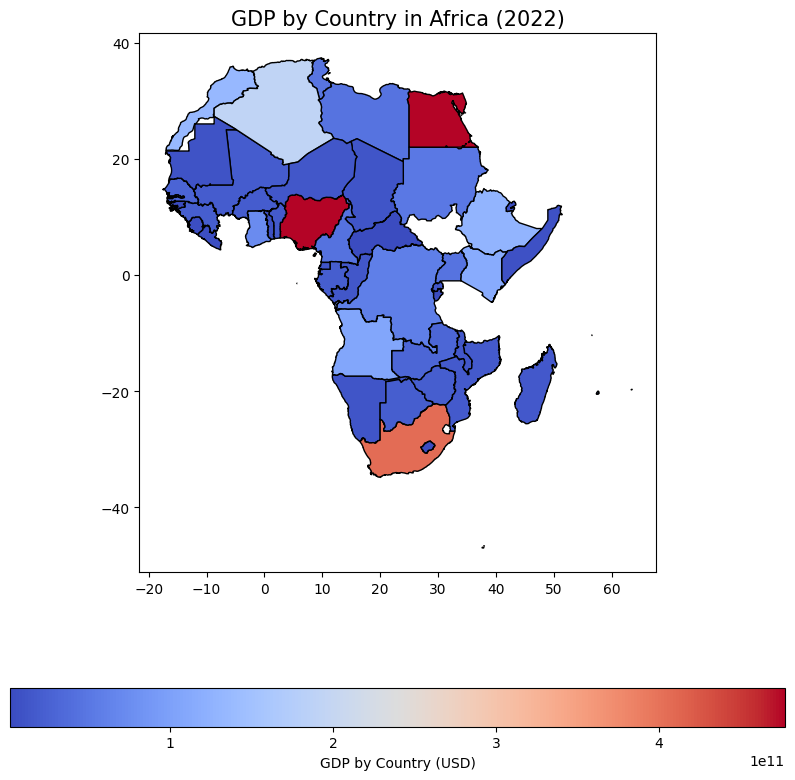

In [20]:
# Plot the map with GDP values
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the geometry and color by GDP (USD)
joined_data.plot(column='GDP (USD)', ax=ax, legend=True,
                 legend_kwds={'label': "GDP by Country (USD)",
                              'orientation': "horizontal"},
                 cmap='coolwarm', edgecolor='k')

# Add a title
ax.set_title('GDP by Country in Africa (2022)', fontsize=15)

# Show the plot
plt.show()